<a href="https://colab.research.google.com/github/chakrateja70/Classifying-newsWires/blob/main/Copy_of_Classifying_newsWires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Loading the Reuters dataset

from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [2]:
#decoding newswires back to text

word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

550378/550378 [==============================] - 0s 0us/step


In [3]:
#Encoding the data
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [18]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [19]:
from keras.utils import to_categorical


one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [5]:
#Model definition
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [20]:
#Compiling the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
#Setting aside a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [22]:
#Training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 81ms/step - loss: 2.5749 - accuracy: 0.5172 - val_loss: 1.7765 - val_accuracy: 0.6320
Epoch 2/20
16/16 [==============================] - 1s 54ms/step - loss: 1.5196 - accuracy: 0.6792 - val_loss: 1.3918 - val_accuracy: 0.6950
Epoch 3/20
16/16 [==============================] - 1s 53ms/step - loss: 1.1925 - accuracy: 0.7433 - val_loss: 1.2277 - val_accuracy: 0.7390
Epoch 4/20
16/16 [==============================] - 1s 62ms/step - loss: 0.9847 - accuracy: 0.7895 - val_loss: 1.1075 - val_accuracy: 0.7680
Epoch 5/20
16/16 [==============================] - 1s 94ms/step - loss: 0.8283 - accuracy: 0.8203 - val_loss: 1.0400 - val_accuracy: 0.7740
Epoch 6/20
16/16 [==============================] - 1s 87ms/step - loss: 0.6969 - accuracy: 0.8475 - val_loss: 0.9761 - val_accuracy: 0.8000
Epoch 7/20
16/16 [==============================] - 1s 53ms/step - loss: 0.5892 - accuracy: 0.8690 - val_loss: 0.9343 - val_accuracy: 0.8060
Epoch 8/20
16

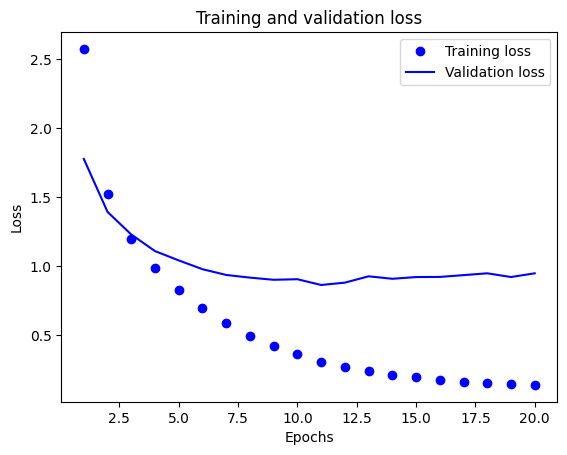

In [23]:
#Plotting the training and validation loss
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

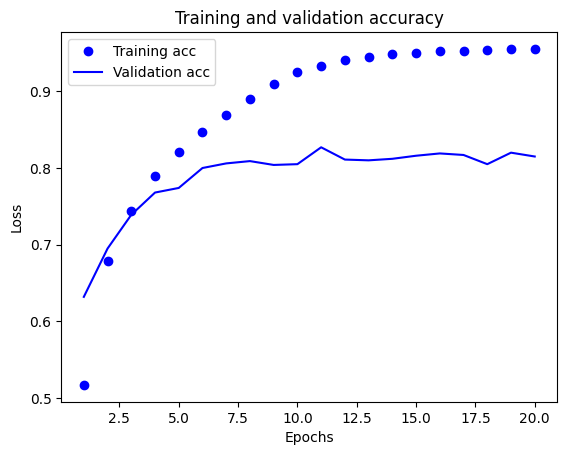

In [24]:
#plotting the training and validation accuracy
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [25]:
#Retaining a model from scratch
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/8
16/16 [==============================] - 2s 78ms/step - loss: 2.7211 - accuracy: 0.5174 - val_loss: 1.8736 - val_accuracy: 0.5910
Epoch 2/8
16/16 [==============================] - 1s 55ms/step - loss: 1.5108 - accuracy: 0.6733 - val_loss: 1.3693 - val_accuracy: 0.7130
Epoch 3/8
16/16 [==============================] - 1s 53ms/step - loss: 1.1322 - accuracy: 0.7598 - val_loss: 1.1577 - val_accuracy: 0.7380
Epoch 4/8
16/16 [==============================] - 1s 55ms/step - loss: 0.9198 - accuracy: 0.8011 - val_loss: 1.0596 - val_accuracy: 0.7740
Epoch 5/8
16/16 [==============================] - 1s 55ms/step - loss: 0.7571 - accuracy: 0.8354 - val_loss: 0.9998 - val_accuracy: 0.7810
Epoch 6/8
16/16 [==============================] - 1s 55ms/step - loss: 0.6291 - accuracy: 0.8633 - val_loss: 0.9468 - val_accuracy: 0.7990
Epoch 7/8
16/16 [==============================] - 1s 53ms/step - loss: 0.5257 - accuracy: 0.8874 - val_loss: 0.9176 - val_accuracy: 0.7900
Epoch 8/8
71/71 [===